In [3]:
# init weaviate client
import weaviate
def init_client():
    return weaviate.Client(url="http://localhost:8081")

client = init_client()

In [4]:
# get all tracks
def get_all_tracks(client):
    print("Getting all tracks...")
    result = client.data_object.get(class_name="Track", with_vector=True, limit=10000)

    tracks = result["objects"]

    print("Done.")
    return tracks

# save tracks
def save_tracks(tracks):
    print("Saving tracks...")
    import pickle
    with open("data/tracks.pkl", "wb") as f:
        pickle.dump(tracks, f)

# read tracks
def read_tracks():
    print("Reading tracks...")
    import pickle
    with open("data/tracks.pkl", "rb") as f:
        tracks = pickle.load(f)
    return tracks

# tracks = get_all_tracks(client)
# save_tracks(tracks)
tracks = read_tracks()

print(f"Length of tracks: {len(tracks)}")

Getting all tracks...
Done.
Saving tracks...
Reading tracks...
Length of tracks: 10000


In [7]:
def get_all_vectors(tracks):
    print("Getting all vectors...")
    vectors = [o["vector"] for o in tracks]
    return vectors

vectors = get_all_vectors(tracks)
print(tracks[0])

print(f"Length of vectors: {len(tracks)}")

Getting all vectors...
{'class': 'Track', 'creationTimeUnix': 1686147506358, 'id': '00053c48-1ce9-45b4-830d-ec01206e0de8', 'lastUpdateTimeUnix': 1686147506358, 'properties': {'acousticness': 0.41, 'album_id': '7tB40pGzj6Tg0HePj2jWZt', 'album_name': 'News Of The World (2011 Remaster)', 'album_release_date': '1977-10-28', 'artist_name': 'Queen', 'danceability': 0.446, 'duration_ms': 230120, 'energy': 0.713, 'genre': 'rock', 'instrumentalness': 0, 'key': 8, 'liveness': 0.212, 'loudness': -4.825, 'lyrics': "Get down, make love Get down, make love Get down, make love Get down, make love You take my body, I give you heat You say you're hungry, I give you meat I suck your mind, you blow my head Make love (Make love) inside your bed Everybody get down, make love Get down, make love Get down, make love Get down, make love Every time I get hot, you wanna cool down Every time I get high, you say you wanna come down You say it's enough, in fact, it's too much Every time I get a, get down, get down

Visualizing vectors...
[-0.06430846, -0.24293041, 0.110439375, -0.100999914, 0.09629649, -0.04072969, -0.169328, -0.014131491, 0.117915705, 0.5358003, 0.13591173, 0.1179824, -0.08689239, 0.060807075, 0.09822265, 0.19681141, -0.14886066, 0.060191516, -0.46446335, -0.016015284, 0.06305353, 0.14932896, -0.25746924, 0.1558214, -0.2350968, -0.44718155, 0.27163702, -0.54405105, -0.09141091, 0.050858628, 0.34632823, 0.48786363, 0.32426932, 0.5739468, 0.23869427, -0.3895692, 0.04086138, 0.30526224, -0.09721386, 0.7694963, -0.23109816, 0.25778306, 0.06246513, -0.15824226, -0.07554409, 0.4262448, 0.3915728, -0.10568536, -0.3647673, 0.012407957, -0.6349575, -0.2149216, -0.2833733, -0.45024365, -0.09075926, 0.13799985, -0.096156955, -0.15037905, 0.1893991, 0.1821173, 0.57067454, -0.8982235, -0.4192168, -0.25409874, 0.298224, -0.22855514, -0.17255244, -0.2956281, -0.19140317, -0.08400424, -0.14878975, 0.08089396, 0.11062146, -0.19968952, 0.5094097, -0.5838567, -0.17085947, 0.096286826, 0.2912769, 0

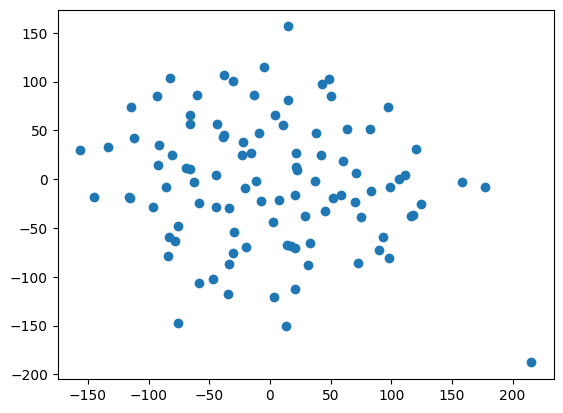

In [6]:
# visualize vectors
def visualize_vectors(vectors):
    print("Visualizing vectors...")
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.manifold import TSNE

    # convert to numpy array
    vectors = np.array(vectors)

    # cut to 100
    vectors = vectors[:100]
    # reduce dimensionality
    tsne = TSNE(n_components=3, random_state=0)
    vectors_2d = tsne.fit_transform(vectors)

    # categorize by genre
    
    # plot
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
    plt.show()

# todo: visualize query


visualize_vectors(vectors)